In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [13]:
dataset = pd.read_csv('/Users/mousumykundu/Desktop/MAS_Class_Github/4th_quarter/Machine_Learning/Project/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv')

In [3]:
# url = "https://data.cdc.gov/api/views/dttw-5yxu/rows.csv?accessType=DOWNLOAD"
# dataset = pd.read_csv(url)


In [14]:
dataset.shape

(2763102, 27)

In [15]:
dataset

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE03,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763097,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Smoke some days,Female,Sex,167,...,NaN,BRFSS,CLASS17,Topic55,56,SEX2,CAT2,_SMOKER3,RESP069,"(43.235541343, -108.109830353)"
2763098,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Former smoker,Male,Sex,997,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP070,"(43.235541343, -108.109830353)"
2763099,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Never smoked,Male,Sex,1278,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP071,"(43.235541343, -108.109830353)"
2763100,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Smoke everyday,Male,Sex,417,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP068,"(43.235541343, -108.109830353)"


In [6]:
dataset.isnull().sum()

Year                                0
Locationabbr                        0
Locationdesc                        0
Class                               0
Topic                               0
Question                            0
Response                        17621
Break_Out                           0
Break_Out_Category                  0
Sample_Size                         0
Data_value                     532334
Confidence_limit_Low           536566
Confidence_limit_High          536566
Display_order                     594
Data_value_unit                     0
Data_value_type                     0
Data_Value_Footnote_Symbol    2229766
Data_Value_Footnote           2229766
DataSource                          0
ClassId                             0
TopicId                             0
LocationID                          0
BreakoutID                          0
BreakOutCategoryID                  0
QuestionID                          0
ResponseID                          0
GeoLocation 

In [7]:
dataset['Topic'].unique()

array(['Alcohol Consumption', 'Employment', 'Binge Drinking',
       'Heavy Drinking', 'BMI Categories', 'Arthritis', 'Asthma',
       'Cardiovascular Disease', 'COPD', 'Depression', 'Diabetes',
       'Kidney', 'Other Cancer', 'Skin Cancer', 'Blood Stool Test',
       'Colonoscopy', 'Sigmoidoscopy', 'USPSTF Recommendations', 'Age',
       'Disability status', 'Education', 'Hearing', 'Income', 'Internet',
       'Marital Status', 'Number of Children', 'Race', 'Dental Visit',
       'Rent/Own Home', 'Sex', 'Veteran Status', 'E-Cigarette Use',
       'Health Care Cost', 'Health Care Coverage', 'Last Checkup',
       'Personal Care Provider', 'Under 65 Coverage',
       'Fair or Poor Health', 'Overall Health', 'HIV Test', 'Flu Shot',
       'Pneumonia Vaccination', 'Drink and Drive', 'Seatbelt Use',
       'All Teeth Removed', 'Teeth Removed', 'Exercise', 'PSA Test',
       'Current Smoker Status', 'Smokeless Tobacco', 'Smoker Status',
       'Mammogram', 'Pap Test', 'Vision', 'Cholestero

1. How many observations does your dataset have?

In [8]:
dataset.shape

(2763102, 27)

In [16]:
print(f"Rows: {dataset.shape[0]}")
print(f"Columns: {dataset.shape[1]}")

Rows: 2763102
Columns: 27


2. Describe all columns in your dataset their scales and data distributions. Describe the categorical and continuous variables in your dataset. Describe your target column and if you are using images plot some example classes of the images.

In [24]:
dataset.columns

Index(['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High',
       'Display_order', 'Data_value_unit', 'Data_value_type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource',
       'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID',
       'QuestionID', 'ResponseID', 'GeoLocation'],
      dtype='object')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763102 entries, 0 to 2763101
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   Locationabbr                object 
 2   Locationdesc                object 
 3   Class                       object 
 4   Topic                       object 
 5   Question                    object 
 6   Response                    object 
 7   Break_Out                   object 
 8   Break_Out_Category          object 
 9   Sample_Size                 int64  
 10  Data_value                  float64
 11  Confidence_limit_Low        float64
 12  Confidence_limit_High       float64
 13  Display_order               float64
 14  Data_value_unit             object 
 15  Data_value_type             object 
 16  Data_Value_Footnote_Symbol  object 
 17  Data_Value_Footnote         object 
 18  DataSource                  object 
 19  ClassId              

In [25]:
dataset.head()

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE03,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"


In [17]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [29]:
categorical_cols

['Locationabbr',
 'Locationdesc',
 'Class',
 'Topic',
 'Question',
 'Response',
 'Break_Out',
 'Break_Out_Category',
 'Data_value_unit',
 'Data_value_type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'DataSource',
 'ClassId',
 'TopicId',
 'BreakoutID',
 'BreakOutCategoryID',
 'QuestionID',
 'ResponseID',
 'GeoLocation']

In [18]:
numeric_cols

['Year',
 'Sample_Size',
 'Data_value',
 'Confidence_limit_Low',
 'Confidence_limit_High',
 'Display_order',
 'LocationID']

In [19]:
print("\nStatistical Summary of Numerical Columns:\n")
print(dataset[numeric_cols].describe())



Statistical Summary of Numerical Columns:

               Year   Sample_Size    Data_value  Confidence_limit_Low  \
count  2.763102e+06  2.763102e+06  2.230768e+06          2.226536e+06   
mean   2.017430e+03  6.391668e+02  4.044557e+01          3.710332e+01   
std    3.606456e+00  1.357030e+03  3.323589e+01          3.300205e+01   
min    2.011000e+03  0.000000e+00  0.000000e+00          0.000000e+00   
25%    2.014000e+03  3.300000e+01  1.070000e+01          8.000000e+00   
50%    2.017000e+03  1.630000e+02  2.860000e+01          2.380000e+01   
75%    2.021000e+03  6.150000e+02  7.360000e+01          6.890000e+01   
max    2.023000e+03  3.749200e+04  1.000000e+02          1.000000e+02   

       Confidence_limit_High  Display_order    LocationID  
count           2.226536e+06   2.762508e+06  2.763102e+06  
mean            4.379661e+01   7.912646e+02  3.089425e+01  
std             3.370820e+01   1.251560e+03  1.774223e+01  
min             0.000000e+00   1.000000e+00  1.000000e+00 

In [20]:
print("\nStatistical Summary of Categorical Columns:\n")
print(dataset[categorical_cols].describe())



Statistical Summary of Categorical Columns:

       Locationabbr Locationdesc         Class              Topic  \
count       2763102      2763102       2763102            2763102   
unique           56           56            21                 66   
top              NE     Nebraska  Demographics  Disability status   
freq          52099        52099        971373             176818   

                               Question Response Break_Out Break_Out_Category  \
count                           2763102  2745481   2763102            2763102   
unique                               99      151        49                  6   
top     What is your employment status?       No   Overall     Race/Ethnicity   
freq                             140716   615572    116860             768868   

       Data_value_unit   Data_value_type Data_Value_Footnote_Symbol  \
count          2763102           2763102                     533336   
unique               1                 1                    

# Plot distributions of numerical variables

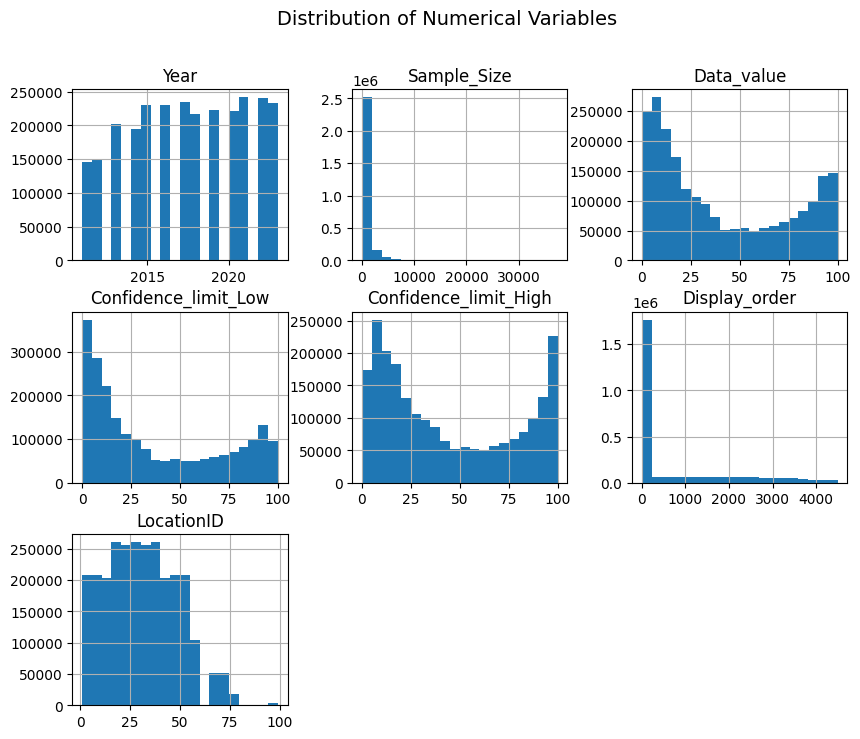

In [21]:
dataset[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribution of Numerical Variables', fontsize=14)
plt.show()

Describe your target column

3. Do you have missing and duplicate values in your dataset?

In [22]:
missing_values = dataset.isnull().sum()
missing_percent = (missing_values / len(dataset)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent (%)': missing_percent.round(2)
}).sort_values(by='Percent (%)', ascending=False)

print("Missing Value Summary:\n")
print(missing_summary)

# Count duplicate rows
num_duplicates = dataset.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Missing Value Summary:

                            Missing Values  Percent (%)
Data_Value_Footnote                2229766        80.70
Data_Value_Footnote_Symbol         2229766        80.70
Confidence_limit_High               536566        19.42
Confidence_limit_Low                536566        19.42
Data_value                          532334        19.27
Response                             17621         0.64
GeoLocation                           4250         0.15
Display_order                          594         0.02
Break_Out_Category                       0         0.00
DataSource                               0         0.00
ResponseID                               0         0.00
QuestionID                               0         0.00
BreakOutCategoryID                       0         0.00
BreakoutID                               0         0.00
LocationID                               0         0.00
TopicId                                  0         0.00
ClassId                 

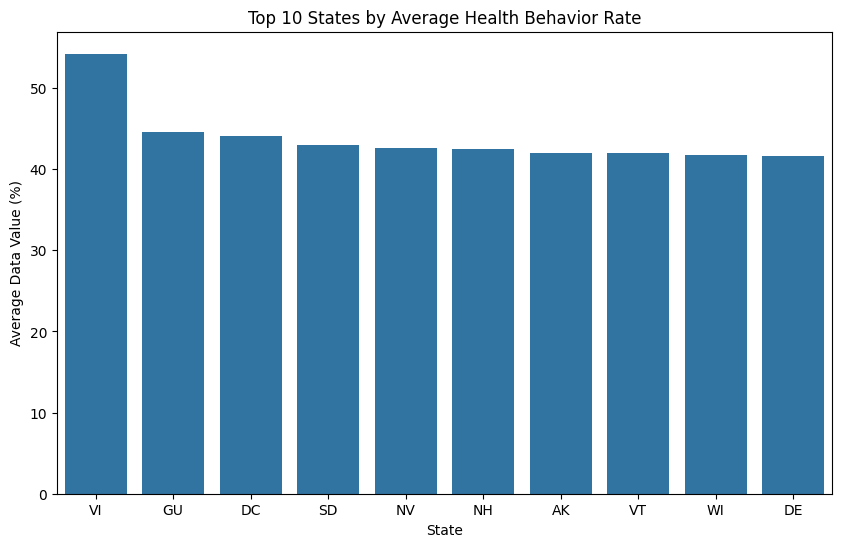

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#BAR PLOT — Average Data Value by State (Top 10)
plt.figure(figsize=(10,6))
avg_state = dataset.groupby('Locationabbr')['Data_value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_state.index, y=avg_state.values)
plt.title('Top 10 States by Average Health Behavior Rate')
plt.xlabel('State')
plt.ylabel('Average Data Value (%)')
plt.show()


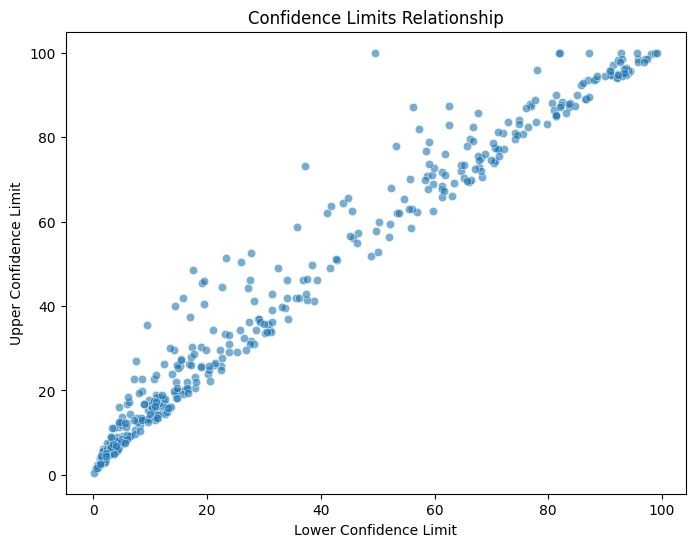

In [24]:
#SCATTER PLOT — Confidence Interval vs Data Value
plt.figure(figsize=(8,6))
sns.scatterplot(x='Confidence_limit_Low', y='Confidence_limit_High', 
                data=dataset.sample(500, random_state=42), alpha=0.6)
plt.title('Confidence Limits Relationship')
plt.xlabel('Lower Confidence Limit')
plt.ylabel('Upper Confidence Limit')
plt.show()


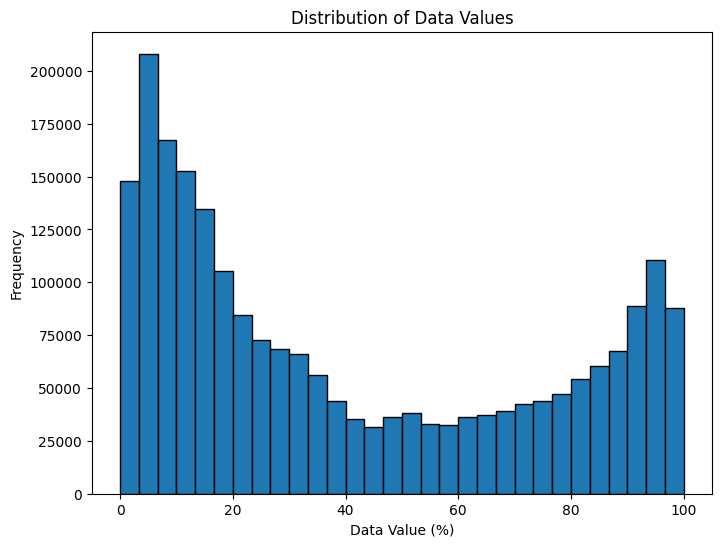

In [25]:
#HISTOGRAM — Distribution of Data Values
plt.figure(figsize=(8,6))
plt.hist(dataset['Data_value'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value (%)')
plt.ylabel('Frequency')
plt.show()

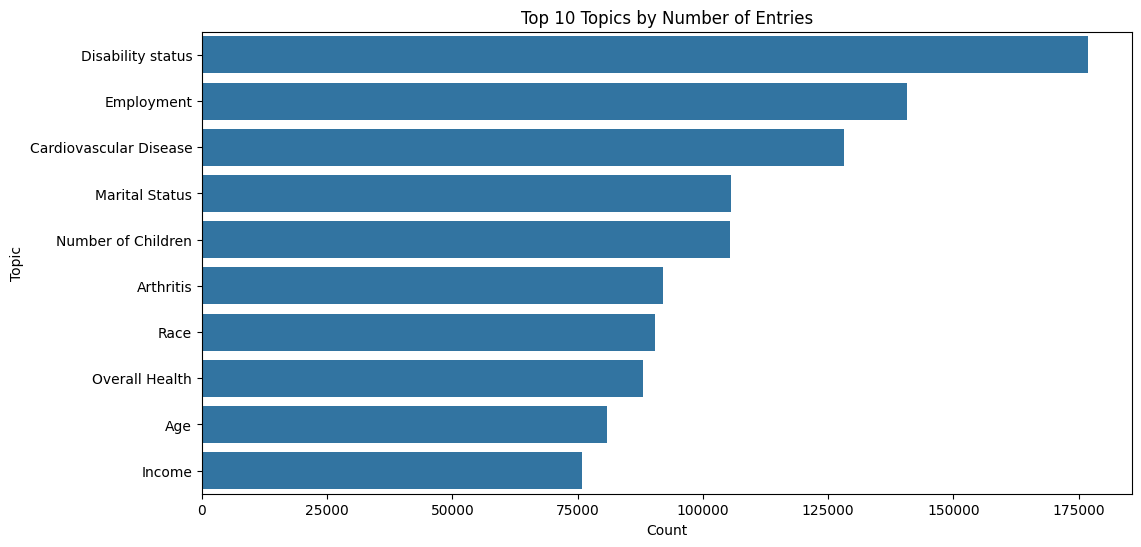

In [26]:
#COUNT PLOT — Number of Entries per Topic
plt.figure(figsize=(12,6))
sns.countplot(y='Topic', data=dataset, order=dataset['Topic'].value_counts().index[:10])
plt.title('Top 10 Topics by Number of Entries')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

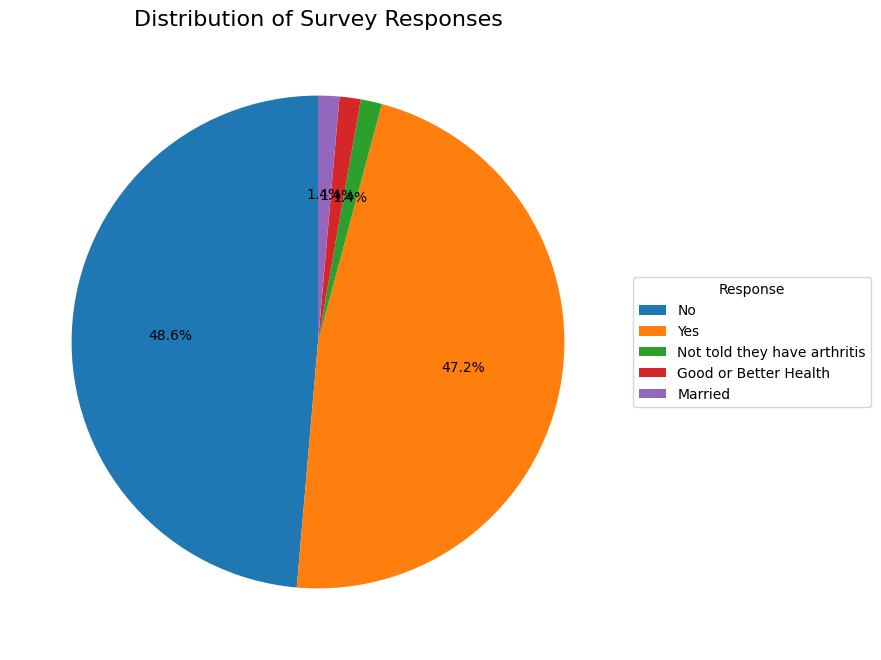

In [27]:
plt.figure(figsize=(10,8))
response_counts = dataset['Response'].value_counts().head(5)

plt.pie(response_counts, 
        labels=None,  # hide labels
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Distribution of Survey Responses', fontsize=16)
plt.legend(response_counts.index, title="Response", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



In [6]:
response_counts

Response
No                              615572
Yes                             597505
Not told they have arthritis     17623
Good or Better Health            17621
Married                          17621
Name: count, dtype: int64

In [28]:
dataset.isna().sum()

Year                                0
Locationabbr                        0
Locationdesc                        0
Class                               0
Topic                               0
Question                            0
Response                        17621
Break_Out                           0
Break_Out_Category                  0
Sample_Size                         0
Data_value                     532334
Confidence_limit_Low           536566
Confidence_limit_High          536566
Display_order                     594
Data_value_unit                     0
Data_value_type                     0
Data_Value_Footnote_Symbol    2229766
Data_Value_Footnote           2229766
DataSource                          0
ClassId                             0
TopicId                             0
LocationID                          0
BreakoutID                          0
BreakOutCategoryID                  0
QuestionID                          0
ResponseID                          0
GeoLocation 

# Milestone III

# 1.Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).  (10 points)

## Data Preprocessing

In [ ]:
# removing duplicates
df_new = dataset.drop_duplicates().copy()

In [ ]:
#Keepping Response Separate
responses = df_new['Response'].copy()
cols_to_drop = ['Response', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol']
df_new = df_new.drop(columns=cols_to_drop)

Response is our target for evaluation, not a feature for clustering. Footnote columns are mostly missing and not useful for clustering, so we are dropping these columns.

#### Identify Numerical and Categorical Features

In [53]:
num_features = ['Data_value', 'Sample_Size', 'Confidence_limit_Low', 'Confidence_limit_High']
cat_features = df_new.select_dtypes(include='object').columns


Clustering algorithms require numeric input. We have separated numerical vs categorical to apply appropriate preprocessing.

#### Handle Missing Values
Missing numeric values → replaced with median

Missing categorical values → replaced with most frequent value

In [54]:
num_imputer = SimpleImputer(strategy='median')
df_new[num_features] = num_imputer.fit_transform(df_new[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df_new[cat_features] = cat_imputer.fit_transform(df_new[cat_features])


## Encode Categorical Variables

In [55]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = encoder.fit_transform(df_new[cat_features])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_features))
df_new = pd.concat([df_new[num_features], cat_encoded_df], axis=1)


K-Means works on numeric data only. Here we are using One-hot encoding which converts categorical features (like Locationdesc or Class) into binary columns. Ensures all categorical variables can be used in clustering.

## Scale Numerical Features

K-Means uses Euclidean distance, so features must be on the same scale which prevents numeric features with larger ranges from dominating the clustering

In [56]:
scaler = StandardScaler()
df_new[num_features] = scaler.fit_transform(df_new[num_features])


## Feature Transformation & Expansion

In [57]:
df_new['log_Sample_Size'] = np.log1p(df_new['Sample_Size'])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_new[num_features])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(num_features))
df_new = pd.concat([df_new, poly_df], axis=1)


Log-transform reduces skewness in Sample_Size. Polynomial features create interaction terms and squared features which allows K-Means to detect more complex patterns.

# 2: Train your first model and analyze your model's performance. Evaluate your model and compare training vs. test error. (10 points)

## K-Means Clustering
Groups similar observations into k clusters
random_state ensures reproducibility
K-Means partitions the data based on feature similarity

In [ ]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_new)

In [61]:
# Add clusters and keep Response for evaluation
df_eval = pd.DataFrame({
    'Cluster': cluster_labels,
    'Response': responses
})

# Group rare responses: keep top 10, rest as 'Other'
top_responses = df_eval['Response'].value_counts().nlargest(10).index
df_eval['Response_grouped'] = df_eval['Response'].apply(lambda x: x if x in top_responses else 'Other')



The Response column has hundreds of unique values, plotting all would be messy. We keep the 10 most frequent responses and group the rest as "Other" to simplify analysis and visualization.
To make the cluster evaluation plots clearer, we grouped less frequent responses under "Other" so that the top responses dominate the visualization.

In [66]:
df_eval.groupby('Cluster')['Response_grouped'].value_counts()


Cluster  Response_grouped            
0        Other                           1278087
         Yes                              536859
         No                               243153
         Fair or Poor Health               17618
         Former smoker                     17602
         Good                              17590
         Very good                         17571
         Married                           16478
         Never smoked                      15073
         Not told they have arthritis       5964
         Good or Better Health              3892
1        No                                26090
         Other                              9801
         Yes                                4140
         Good or Better Health               961
         Not told they have arthritis        566
         Never smoked                        326
         Married                             303
         Very good                            46
         Good                  

##### Cluster Evaluation & Visualization

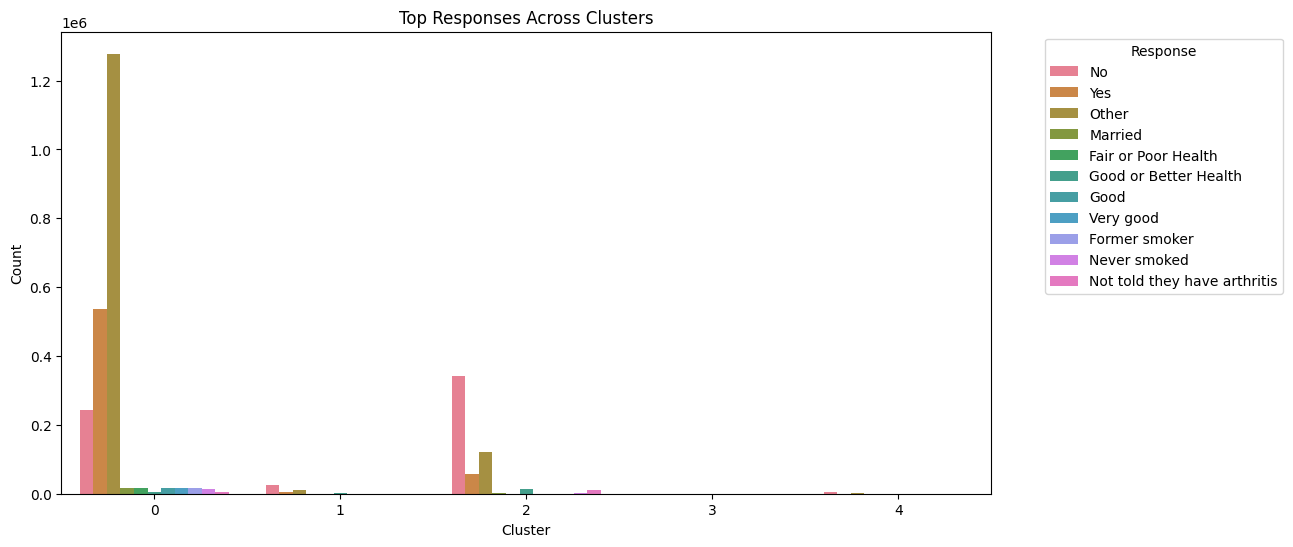

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster', hue='Response_grouped', data=df_eval)
plt.title("Top Responses Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretation: After applying K-Means clustering with 5 clusters, we examined the distribution of survey responses within each cluster.
Cluster 0 represents the largest segment, containing a majority of "Other", "Yes", and "No" responses, indicating a diverse population with mixed responses.
Cluster 2 also captures a large group but has a higher proportion of "No" responses, suggesting a population segment less likely to respond positively.
Clusters 1, 3, and 4 are smaller and contain niche populations or outliers, with "No" dominating but with fewer overall responses.

These results indicate that K-Means successfully separates populations by general response patterns, with larger clusters representing the main population and smaller clusters highlighting specialized groups. This separation can help guide further analysis, targeting, or interventions based on demographic and survey features.

In [74]:
print("K-Means inertia (sum of squared distances within clusters):", kmeans.inertia_)

K-Means inertia (sum of squared distances within clusters): 78505830.46797928


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Take a random sample of 10,000 rows
sample_idx = np.random.choice(df_new.index, size=10000, replace=False)
df_sample = df_new.loc[sample_idx]
labels_sample = cluster_labels[sample_idx]

score = silhouette_score(df_sample, labels_sample)
print("Silhouette score (sampled):", score)


Silhouette score (sampled): 0.3841738638268125


To evaluate cluster quality, we calculated the silhouette score on a random sample of 10,000 rows due to the dataset's size. The sampled silhouette score is 0.384, indicating that clusters are moderately well-separated. This aligns with the cluster distributions, where larger clusters capture the majority of responses and smaller clusters represent specialized or less frequent patterns. The score suggests that while clusters are meaningful, there is some overlap among populations, which is expected in survey data with diverse response

# 3: Answer the questions: Where does your model fit in the fitting graph? (Build at least one model with different hyperparameters and check for over/underfitting, pick the best model). What are the next models you are thinking of and why? (5 points)

Where does your model fit in the fitting graph?

Where does your model fit in the fitting graph?

We trained K-Means with 5 clusters. Using the Elbow Method (plotting inertia vs. number of clusters), we chose k=5 where inertia starts to flatten, indicating that additional clusters do not significantly reduce intra-cluster distances. The sampled silhouette score of 0.384 shows moderate cluster separation, suggesting the model captures meaningful patterns without overfitting the dataset.

Overfitting vs. underfitting:

Underfitting: Too few clusters → high inertia, low silhouette score.

Overfitting: Too many clusters → very low inertia, but clusters may be meaningless (splitting natural groups unnecessarily).

k=5 is a balance, representing main population segments without over-segmenting.

#### Build at least one model with different hyperparameters

We can compare different numbers of clusters, e.g., k=3 and k=7:

In [72]:
from sklearn.metrics import silhouette_score

for k in [3, 5, 7]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_new)
    sample_idx = np.random.choice(df_new.index, size=10000, replace=False)
    sample_labels = labels[sample_idx]
    score = silhouette_score(df_new.loc[sample_idx], sample_labels)
    print(f"k={k}, Inertia={km.inertia_:.2f}, Silhouette (sampled)={score:.3f}")


k=3, Inertia=135494116.77, Silhouette (sampled)=0.415
k=5, Inertia=78505830.47, Silhouette (sampled)=0.381
k=7, Inertia=64884350.03, Silhouette (sampled)=0.146


Interpretation: We tested K-Means with k = 3, 5, and 7 to analyze model fit. The silhouette score was highest for k=3 (0.415), indicating the best separation between clusters. While increasing k reduces inertia (cluster compactness), the silhouette score dropped at k=5 (0.381) and significantly at k=7 (0.146), showing that higher k values begin to overfit by creating overly fragmented clusters with poor separation. Therefore, k=3 provides the best balance between underfitting and overfitting and represents the optimal clustering configuration for this dataset.

### Next models you are thinking of and why


To further improve clustering performance and gain deeper insights into the data structure, several alternative models can be explored beyond K-Means. Hierarchical Clustering is a strong next candidate because it does not require pre-specifying the number of clusters and provides dendrogram visualizations that reveal natural groupings within the dataset, making it useful for exploratory analysis. DBSCAN is another promising approach as it is density-based and can detect clusters of arbitrary shapes while effectively identifying outliers as noise—something K-Means cannot handle well. Additionally, Gaussian Mixture Models (GMM) offer a probabilistic perspective by providing the likelihood of each point belonging to different clusters. Unlike K-Means, which assumes spherical clusters with equal variance, GMM can model elliptical clusters and overlapping groups more effectively. Exploring these methods is valuable because real-world survey data rarely conforms to the strict assumptions of K-Means; using more flexible models can better capture complex patterns, noise, and variability in the dataset.

## Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it? (5 points)

The first model used for clustering was K-Means with five clusters, applied after completing data preprocessing. The model produced a silhouette score of approximately 0.38, indicating a moderate level of cluster separation. This suggests that the model was able to identify meaningful patterns and group individuals with similar demographic and response behaviors, although some overlap between clusters still exists. The inertia score further supported that the clusters created were reasonably compact. Analysis of the cluster distribution showed that one cluster contained a large portion of the data, while the remaining clusters represented smaller, more specific population groups, indicating that the dataset is somewhat imbalanced and certain response patterns dominate. Overall, K-Means served as a solid initial model for uncovering structure within the data; however, there is room for improvement. Model performance could likely be enhanced by experimenting with different values of k, trying alternative clustering techniques such as Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models, and applying dimensionality reduction methods like PCA or t-SNE prior to clustering to better separate patterns in high-dimensional space. Additionally, addressing category imbalance or applying soft clustering may yield more refined and interpretable clusters.